# Modeling using Decision Tree Classifier

In [28]:
# Loading Libraries
import numpy as np 
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score

from tabulate import tabulate

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']=(10, 8)

In [3]:
# Loading data
PATH = 'Feature Creation/train_short_features.csv'
df=pd.read_csv(PATH)
df.head()

from-to  score   userA_id   userB_id  has_common_skills  \
0  4769697-6308211    3.0  4769697.0  6308211.0                0.0   
1  6275668-6308211    2.0  6275668.0  6308211.0                1.0   
2  6307254-6308211    3.0  6307254.0  6308211.0                0.0   
3  1208644-6308211    2.0  1208644.0  6308211.0                0.0   
4  6275807-6308211    3.0  6275807.0  6308211.0                1.0   

   n_common_skills  has_common_schools  n_common_schools  has_common_industry  \
0             -1.0                 0.0              -1.0                  0.0   
1             -2.0                 0.0              -1.0                  0.0   
2             -1.0                 0.0              -1.0                  0.0   
3              0.0                 0.0              -1.0                  1.0   
4             -2.0                 0.0              -1.0                  1.0   

   n_common_industry  ...  userA_strength_id_7  userA_strength_id_8  \
0                0.0  ...                  1.0                  1.0   
1                0.0  ...                  0.0                  3.0   
2                0.0  ...                  1.0                  3.0   
3                1.0  ...                  0.0                  0.0   
4                1.0  ...                  0.0                  1.0   

   userB_strength_id_1  userB_strength_id_2  userB_strength_id_3  \
0                  1.0                  3.0                  3.0   
1                  1.0                  3.0                  3.0   
2                  1.0                  3.0                  3.0   
3                  1.0                  3.0                  3.0   
4                  1.0                  3.0                  3.0   

   userB_strength_id_4  userB_strength_id_5  userB_strength_id_6  \
0                 15.0                  6.0                 14.0   
1                 15.0                  6.0                 14.0   
2                 15.0                  6.0                 14.0   
3                 15.0                  6.0                 14.0   
4                 15.0                  6.0                 14.0   

   userB_strength_id_7  userB_strength_id_8  
0                  0.0                  8.0  
1                  0.0                  8.0  
2                  0.0                  8.0  
3                  0.0                  8.0  
4                  0.0                  8.0  

[5 rows x 60 columns]

## Preprocessing

In [4]:
# Feature label
X = df.drop(labels=['from-to','userA_id','score', 'userA_id', 'userB_id'],
            axis=1)
y = df['score']

In [6]:
# Train-test Split
# 70-15-15
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=3,
                                                    stratify=y)
X_val,X_test,y_val,y_test =train_test_split(X_test,y_test,
                                            test_size=0.5,
                                            random_state=3,
                                            stratify=y_test)

## Model Building

In [16]:
# Build model
dt_model = DecisionTreeClassifier(random_state=3)

In [22]:
# Fit Model
dt_model.fit(X_train,y_train)
#
# f1 Score over train and test
data = [
    ('set', 'f1_score(micro)'),
    ('Train', f1_score(y_train, dt_model.predict(X_train), average='micro')),
    ('Validation', f1_score(y_val, dt_model.predict(X_val), average='micro'))
]
print(tabulate(data, headers='firstrow'))

set           f1_score(micro)
----------  -----------------
Train                0.999908
Validation           0.359068


## Hyperparameter Optimization

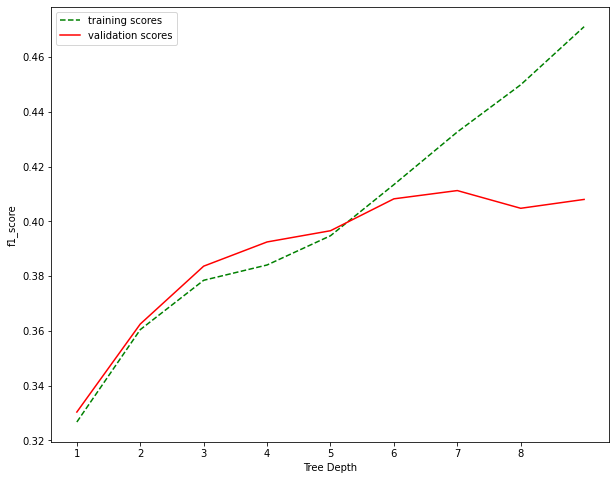

In [37]:
# Tree Depth optimization
#
depths = range(1, 10)
#
train_scores = []
val_scores = []
#
for depth in depths:
    dt_model = DecisionTreeClassifier(random_state=3, max_depth=depth)
    dt_model.fit(X_train, y_train)
    train_scores.append( f1_score(y_train, dt_model.predict(X_train), average='micro'))
    val_scores.append( f1_score(y_val, dt_model.predict(X_val), average='micro'))
#
# Plot
plt.plot(train_scores, 'g--', label='training scores')
plt.plot(val_scores, 'r', label='validation scores')
plt.ylabel('f1_score')
plt.xlabel('Tree Depth')
plt.xticks(range(0, len(depths)-1), labels=depths)
plt.legend()
plt.show()

## Final Optimised Decision Tree `max_depth=5`

In [40]:
# Model init
dt_model = DecisionTreeClassifier(max_depth=5, random_state=3)
#Fit
dt_model.fit(X_train, y_train)
#
# Scoring
data = [
    ('set', 'f1_score(micro)'),
    ('Train', f1_score(y_train, dt_model.predict(X_train), average='micro')),
    ('Validation', f1_score(y_val, dt_model.predict(X_val), average='micro')),
    ('Test', f1_score(y_test, dt_model.predict(X_test), average='micro'))
]
print(tabulate(data, headers='firstrow'))

set           f1_score(micro)
----------  -----------------
Train                0.39476
Validation           0.396593
Test                 0.396723


## Insights
- Consistent model but not accurate
- further introduce more features 

In [52]:
# Saving model
from pickle import dump
dump(dt_model, open('deployment/model_DT.pkl', 'wb'))